In [11]:
# Terra Farm 5-Year Forecast using Prophet
# Forecasting Revenue, Expenses, and Profit from Oct 2024 to Dec 2028

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
# Step 1: Load Your Data

data = pd.read_excel("Terra_Farm_1000_Row_Financial_Data.xlsx")
data.head()

,Date,Cocoa Yield (kg),Cocoa Price per kg,Cocoa Revenue,Plantain Yield (kg),Plantain Price per kg,Plantain Revenue,Total Revenue,Labor Costs,Fertilizer Costs,Transport Costs,Maintenance Costs,Admin Costs,Total Expenses,Profit
0,2022-01-01,148.727613,2.725625,405.375750,147.236993,0.690445,101.659109,507.034859,293.982880,87.369514,68.683009,36.091192,51.963268,538.089863,-31.055004
1,2022-01-02,77.340707,2.584563,199.891949,182.413909,0.906451,165.349180,365.241129,299.943535,99.730947,48.880219,49.604434,86.409772,584.568907,-219.327778
2,2022-01-03,134.964739,2.871022,387.486756,128.570738,0.564580,72.588429,460.075185,290.810205,68.493971,26.004996,45.226531,65.178336,495.714039,-35.638854
3,2022-01-04,85.816272,2.670336,229.158313,157.304515,0.760154,119.575633,348.733946,254.463678,61.613080,69.652705,39.835808,61.460968,487.026239,-138.292293
4,2022-01-05,137.665360,3.105224,427.481822,87.421980,0.514391,44.969109,472.450931,251.027451,69.624764,59.285584,24.583387,33.864146,438.385332,34.065599


In [14]:
from prophet import Prophet

In [15]:
# Step 2: Prepare the Date and Financial Columns

data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Total Revenue', 'Total Expenses', 'Profit']].dropna()
data.head()

,Date,Total Revenue,Total Expenses,Profit
0,2022-01-01,507.034859,538.089863,-31.055004
1,2022-01-02,365.241129,584.568907,-219.327778
2,2022-01-03,460.075185,495.714039,-35.638854
3,2022-01-04,348.733946,487.026239,-138.292293
4,2022-01-05,472.450931,438.385332,34.065599


In [16]:
# Step 3: Define a Forecast Function Using Prophet

def forecast_metric(data, value_column, periods, title):
    prophet_df = data.rename(columns={'Date': 'ds', value_column: 'y'})
    model = Prophet()
    model.fit(prophet_df)

    future = model.make_future_dataframe(periods=periods, freq='M')
    forecast = model.predict(future)

    # Plot Forecast
    fig = model.plot(forecast)
    plt.title(f"{title} Forecast (2024–2028)")
    plt.xlabel("Date")
    plt.ylabel(value_column)
    plt.grid(True)
    plt.show()

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

Revenue Forecast


10:27:57 - cmdstanpy - INFO - Chain [1] start processing
10:27:58 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\DATASOFT\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


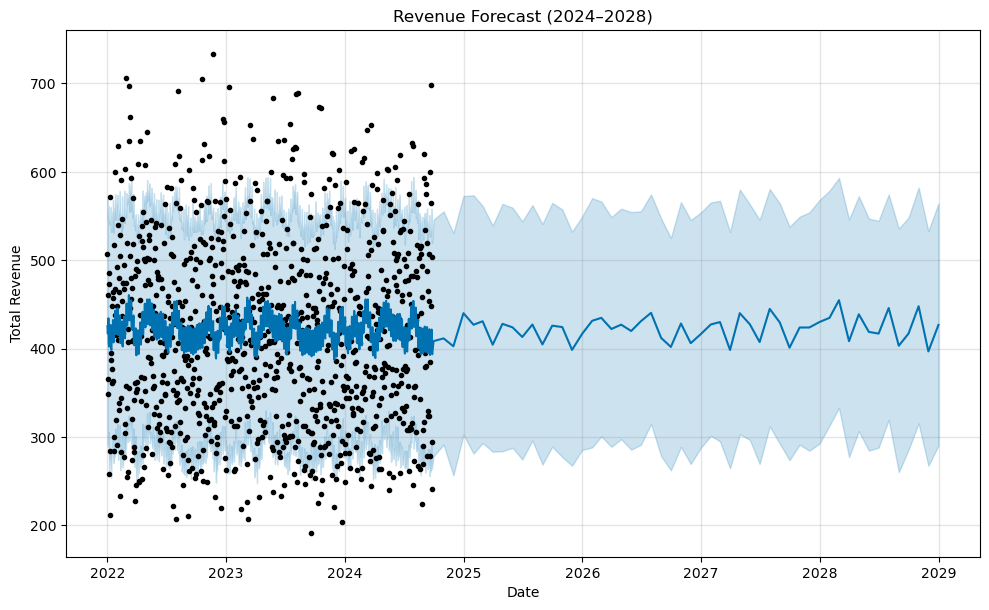

Expenses Forecast


10:28:00 - cmdstanpy - INFO - Chain [1] start processing
10:28:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\DATASOFT\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


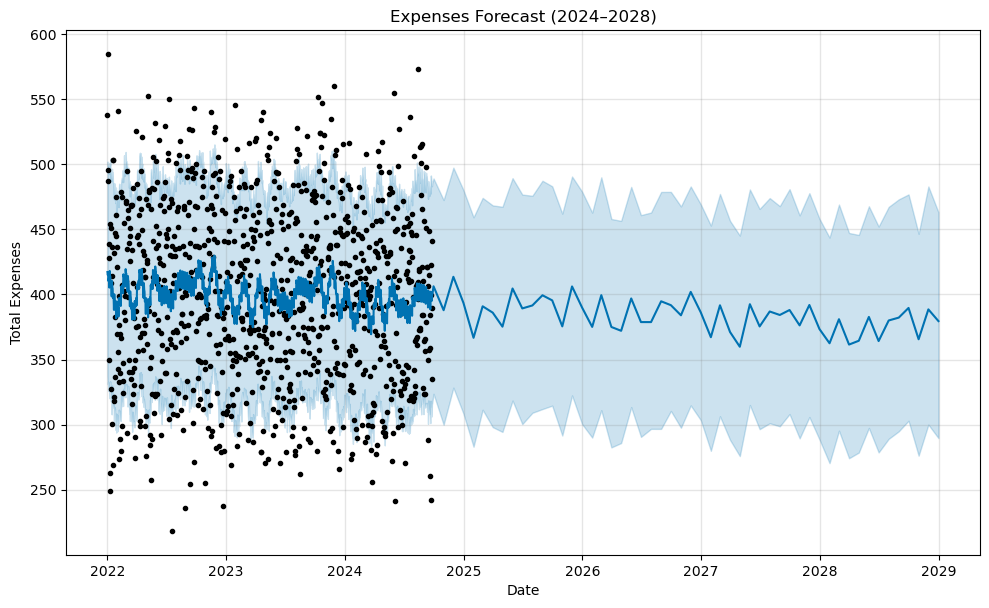

Profit Forecast


10:28:01 - cmdstanpy - INFO - Chain [1] start processing
10:28:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\DATASOFT\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


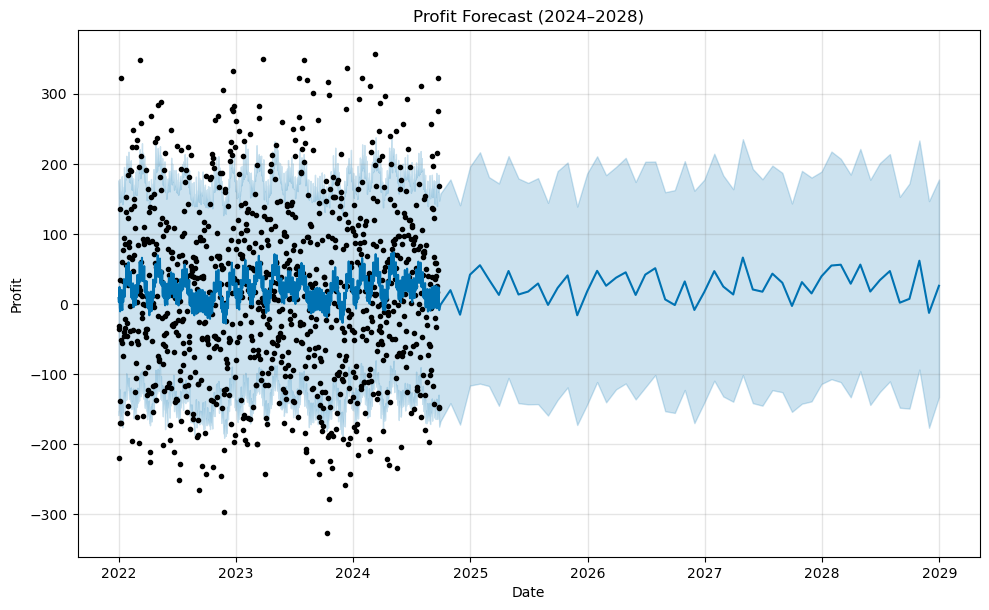

In [17]:
#  Step 4: Forecast Each Metric for 5 Years (51 months)

print("Revenue Forecast")
forecast_revenue = forecast_metric(data[['Date', 'Total Revenue']], 'Total Revenue', periods=52, title='Revenue')

print("Expenses Forecast")
forecast_expenses = forecast_metric(data[['Date', 'Total Expenses']], 'Total Expenses', periods=52, title='Expenses')

print("Profit Forecast")
forecast_profit = forecast_metric(data[['Date', 'Profit']], 'Profit', periods=52, title='Profit')

In [18]:
forecast_revenue.head()

,ds,yhat,yhat_lower,yhat_upper
992,2024-09-19,392.661719,260.493653,526.458789
993,2024-09-20,403.747968,265.386554,541.525981
994,2024-09-21,406.160249,260.823093,535.293432
995,2024-09-22,400.020341,262.387235,529.295211
996,2024-09-23,405.629707,268.394714,537.941691


In [19]:
# Step 5: Export Forecast Data to csv
forecast_revenue.to_csv("forecast_revenue.csv", index=False)
forecast_expenses.to_csv("forecast_expenses.csv", index=False)
forecast_profit.to_csv("forecast_profit.csv", index=False)
